# ITMAL Exercise

REVISIONS| |
---------| |
2018-1219| CEF, initial.                  
2018-0214| CEF, major update and put in sync with under/overfitting exe.         
2018-0220| CEF, fixed revision table malformatting.
2018-0225| CEF, minor text updates, and made Qc optional.
2018-0225| CEF, updated code, made more functions.
2018-0311| CEF, corrected RSME to RMSE.
2019-1008| CEF, updated to ITMAL E19.

## Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning, Ian Goodfellow, et. al. [DL], that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/E19_itmal/L07/Figs/dl_generalization_error.png" style="height:500px">

### Qa On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

### Qa solution
In figure 5.3 the error is depicted on the y-axis, which is the error of the model relative to the true y based on some error model. The capcity of a given model is depicted on the x-axis. 

The training error is the error of the model applied to the training set.
The generalization error is the error of the model applied to the test set.

The zone to the left of Optimal Capacity is the underfitting zone as the generalization error and training error keeps decreasing as the capacity of the model is increased. The zone to the right is the overfitting zone where the training error keeps decreasing but the generalization errors increases leading to overfitting and an increasing generalization gap, which is the gap between the generalization error and the training error.
At optimal capacity the model generalizes the best and has the lowest generalization error.

### Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE: the generalization plot above (figure 5.3 in [DL]) and the plots below have different x-axis, and are not to be compared directly!

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


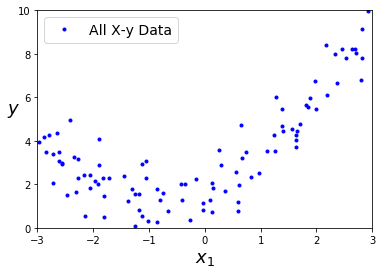

OK


In [1]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [2]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        sgd_reg.fit(X_train, y_train)
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

  epoch= 207, mse_train=0.74, mse_val=1.38
  epoch= 208, mse_train=0.74, mse_val=1.38
  epoch= 209, mse_train=0.73, mse_val=1.38
  epoch= 210, mse_train=0.73, mse_val=1.38
  epoch= 211, mse_train=0.73, mse_val=1.37
  epoch= 212, mse_train=0.73, mse_val=1.37
  epoch= 213, mse_train=0.73, mse_val=1.37
  epoch= 214, mse_train=0.72, mse_val=1.37
  epoch= 215, mse_train=0.72, mse_val=1.37
  epoch= 216, mse_train=0.72, mse_val=1.37
  epoch= 217, mse_train=0.72, mse_val=1.36
  epoch= 218, mse_train=0.72, mse_val=1.36
  epoch= 219, mse_train=0.71, mse_val=1.36
  epoch= 220, mse_train=0.71, mse_val=1.36
  epoch= 221, mse_train=0.71, mse_val=1.36
  epoch= 222, mse_train=0.71, mse_val=1.36
  epoch= 223, mse_train=0.71, mse_val=1.36
  epoch= 224, mse_train=0.70, mse_val=1.36
  epoch= 225, mse_train=0.70, mse_val=1.36
  epoch= 226, mse_train=0.70, mse_val=1.36
  epoch= 227, mse_train=0.70, mse_val=1.36
  epoch= 228, mse_train=0.70, mse_val=1.35
  epoch= 229, mse_train=0.70, mse_val=1.35
  epoch= 23

  epoch= 415, mse_train=0.56, mse_val=1.73
  epoch= 416, mse_train=0.56, mse_val=1.74
  epoch= 417, mse_train=0.56, mse_val=1.74
  epoch= 418, mse_train=0.56, mse_val=1.74
  epoch= 419, mse_train=0.56, mse_val=1.74
  epoch= 420, mse_train=0.56, mse_val=1.75
  epoch= 421, mse_train=0.56, mse_val=1.75
  epoch= 422, mse_train=0.56, mse_val=1.75
  epoch= 423, mse_train=0.56, mse_val=1.76
  epoch= 424, mse_train=0.56, mse_val=1.76
  epoch= 425, mse_train=0.55, mse_val=1.76
  epoch= 426, mse_train=0.55, mse_val=1.77
  epoch= 427, mse_train=0.55, mse_val=1.77
  epoch= 428, mse_train=0.55, mse_val=1.77
  epoch= 429, mse_train=0.55, mse_val=1.78
  epoch= 430, mse_train=0.55, mse_val=1.78
  epoch= 431, mse_train=0.55, mse_val=1.78
  epoch= 432, mse_train=0.55, mse_val=1.78
  epoch= 433, mse_train=0.55, mse_val=1.79
  epoch= 434, mse_train=0.55, mse_val=1.79
  epoch= 435, mse_train=0.55, mse_val=1.79
  epoch= 436, mse_train=0.55, mse_val=1.80
  epoch= 437, mse_train=0.55, mse_val=1.80
  epoch= 43

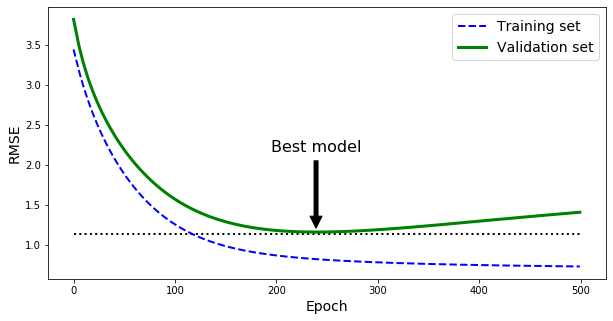

In [3]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

### Qb solution
The code for plotting the RMSE vs. the iteration number is seen in the three cells above.
First, the data is generated an plotted. The data is a 2nd degree polynomial with added gaussian noise.
A pipeline is defined, which includes the generation of a feature matrix with all polynomial combinations to a degree of 90 through the PolynomialFeatures function as well as using the StandardScaler to standardize the features.

For training the `Train()` function is called, which uses an SGD regressor. The training is done in a for loop and each loop-through represents an epoch. After calling the SGDRegressor fit function the predict function is evaluated on the training and validation set and the mean square error is calculated for each epoch.

Then, the best epoch is found by finding the minimum value of the RMSE on the validation set and the RMSE vs. epoch for the training and validation set is plotted.

### [OPTIONAL] Qc  Early Stopping

How would you implement ___early stopping___, in the code above? 

Try it out in the code, and write an explanation of the early stopping concept.

In [ ]:
# TODO: Qc...

### Qd Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below, and explain the generated RMSE-Capacity plot. Why does the _training error keep dropping_, while the _CV-error drops_ until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10?

Iterating...degrees= range(1, 15)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44
  degree=   8, rmse_training=0.10, rmse_cv=0.60
  degree=   9, rmse_training=0.10, rmse_cv=4.61
  degree=  10, rmse_training=0.10, rmse_cv=38.94
  degree=  11, rmse_training=0.10, rmse_cv=154.97
  degree=  12, rmse_training=0.10, rmse_cv=45.52
  degree=  13, rmse_training=0.10, rmse_cv=1150.25
  degree=  14, rmse_training=0.09, rmse_cv=2741.63


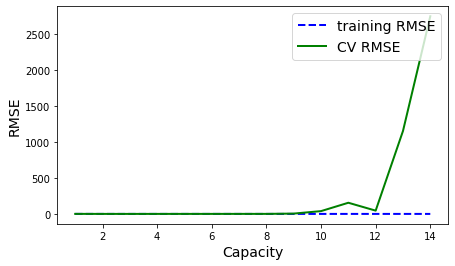

OK


In [6]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,15)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_cv= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_cv=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_cv:4.2f}")
    
    capacities    .append(d)
    rmses_training.append(rmse_training)
    rmses_cv      .append(rmse_cv)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training, "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_cv, "g-", linewidth=2, label="CV RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()


print('OK')

### Qd solution

The reason CV-error begins to rise because of overfitting. When using cross-validation the dataset is split up into 10 folds where 9 are used for training and the remaining fold is used for validation. This is repeated 10 times for different combinations and the mean score is what is shown as CV RMSE on the plot. Because the model is overfitting it performs poorly for generalizing on the validation set and therefore the CV RMSE rises. An example of the overfitting can be seen on the plot below.

Capacity on the x-axis represents the polynomial degree of the model. The RMSE is the average root mean square error for the cross validation as explained above.

When model capacity is increased the CV RMSE keeps rising very rapidly.

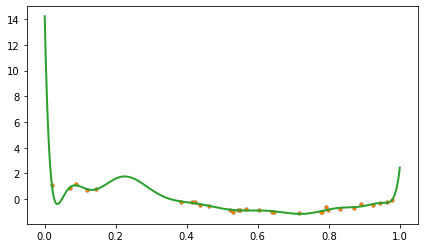

In [17]:
plt.figure(figsize=(7,4))
plt.plot(X, y, ".", linewidth=2, label="training RMSE")
plt.plot(X, y, ".", linewidth=2, label="training RMSE")
plt.plot(np.linspace(0,1,1000).reshape(1000, 1),pipeline.predict(np.linspace(0,1,1000).reshape(1000, 1)), "-", linewidth=2, label="training RMSE")
plt.show()